In [1]:
from lcmo_analysis import *
%matplotlib inline
plt.style.use(['bmh', 'bmh_white', 'article'])

In [8]:
tag_list = ['001_dis', '001', '001_layer', '111', '111_dis', '001_shook']
label_list = ['$\langle 001 \\rangle\,\mathrm{disordered}$',
              '$\langle 001 \\rangle$',
              '$\langle 001 \\rangle\,\mathrm{layered}$',
              '$\langle 111 \\rangle$',
              '$\langle 111 \\rangle\,\mathrm{disordered}$']
calc_dict = dict()
for tag in tag_list:
    calc_dict[tag] = lcmo_info_from_tag(tag)

9 results found for query in scratch.
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
           ID            !?!   Pressure   Volume/fu    Enthalpy/atom   Space group  Formula    # fu   Prov.  
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
      incite line               -0.359     116.158       -555.18910        P-1     MnCoO6La2    4     AIRSS  
      abrupt toys               -1.331     116.797        0.00053          P-1     MnCoO6La2    4     AIRSS  
    homophone cactus            0.736      115.546        0.00057          P-1     MnCoO6La2    4     AIRSS  
     accompany vest             -2.240     117.444        0.00214          P-1     MnCoO6La2    4     AIRSS  
    transcend grade             1.833      114.914        0.00229          P-1     MnCoO6La2    4     AIRSS  
    chattel lettuce             -3.269     118.102        0.00483          P-1    

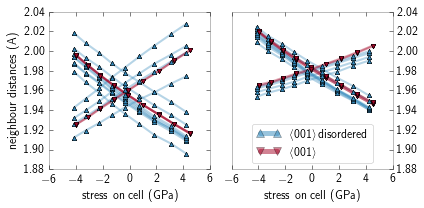

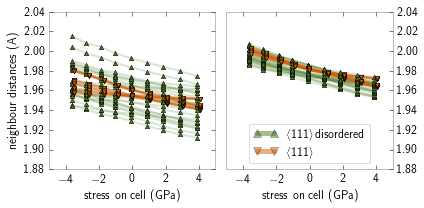

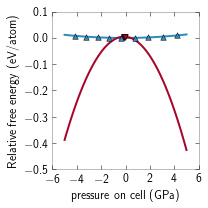

In [9]:
lw = 2
figsize = 3
plots = [0, 1]
plot_atom_dist([tag_list[i] for i in plots], calc_dict, [label_list[i] for i in plots], elems=['MnO', 'CoO'], lw=lw, shift=0, figsize=3)
plots = [4, 3]
plot_atom_dist([tag_list[i] for i in plots], calc_dict, [label_list[i] for i in plots], elems=['MnO', 'CoO'], lw=lw, shift=0, figsize=3)
plots = [0, -1]#, 4, 3]
plot_free_energy([tag_list[i] for i in plots], calc_dict, label_list, figsize=3)

In [5]:
tag_list = ['sto_111_4']
calc_dict = dict()
for tag in tag_list:
    doc_dict = lcmo_info_from_tag(tag)
    if doc_dict is not False:
        calc_dict[tag] = doc_dict

5 results found for query in scratch.
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
           ID            !?!   Pressure   Volume/fu    Enthalpy/atom   Space group  Formula    # fu   Prov.  
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
     toilsome meat              -3.009      57.526       -759.07128        R-3m      SrO3Ti     24    AIRSS  
      unique linen              -4.316      57.928        0.00005          R-3m      SrO3Ti     24    AIRSS  
     exclude sticks             -6.772      58.709        0.00526         P-3m1      SrO3Ti     24    AIRSS  
     drainage copy              0.994       56.405        0.00751          R-3m      SrO3Ti     24    AIRSS  
     punctual mark              -9.136      59.516        0.01518          P2/m      SrO3Ti     24    AIRSS  


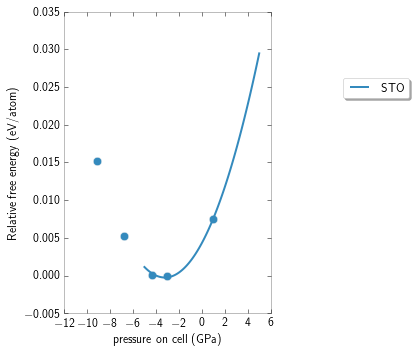

In [20]:
tag_list = ['STO']
calc_dict['STO'] = calc_dict['sto_111_4']
fig = plot_free_energy(tag_list, calc_dict)

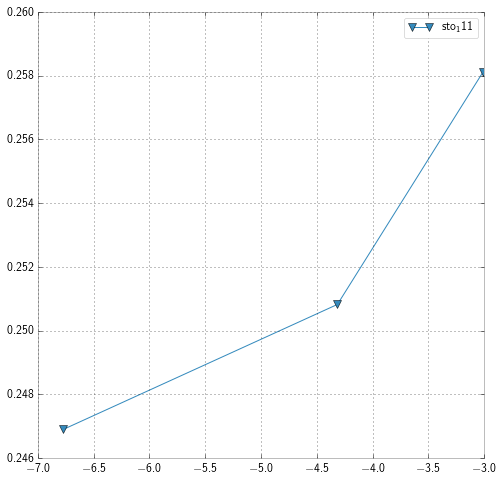

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
for tag in tag_list:
    ax.plot(calc_dict[tag]['pressure'], calc_dict[tag]['poisson_ratio'], label=tag, lw=1, marker='v')
plt.legend(loc=1)
#ax.set_xlim(-3, 3)

(3.061221661642394, -6.7720000000000002)
(2.0408144410949292, -4.3159000000000001)
(1.5305646376468867, -3.0093999999999999)
(0.0, 0.99390000000000001)


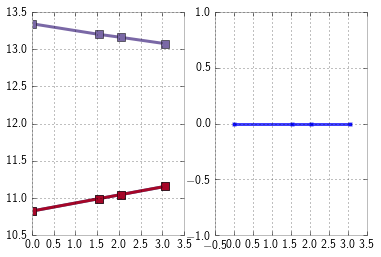

In [13]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for tag in tag_list:

    calc_dict[tag]['a'] = list()
    calc_dict[tag]['b'] = list()
    calc_dict[tag]['c'] = list()
    calc_dict[tag]['alp'] = list()
    calc_dict[tag]['bet'] = list()
    calc_dict[tag]['gam'] = list()
    calc_dict[tag]['biaxial_strain'] = list()
c = ['b', 'r']
for ind, tag in enumerate(tag_list):
    for i in range(len(calc_dict[tag]['pressure'])):
        print(calc_dict[tag]['strain'][i][0], calc_dict[tag]['pressure'][i])
        calc_dict[tag]['a'].append(calc_dict[tag]['lattice_abc'][i][0][0])
        calc_dict[tag]['b'].append(calc_dict[tag]['lattice_abc'][i][0][1])
        calc_dict[tag]['c'].append(calc_dict[tag]['lattice_abc'][i][0][2])
        calc_dict[tag]['alp'].append(calc_dict[tag]['lattice_abc'][i][1][0])
        calc_dict[tag]['bet'].append(calc_dict[tag]['lattice_abc'][i][1][1])
        calc_dict[tag]['gam'].append(calc_dict[tag]['lattice_abc'][i][1][2])
        calc_dict[tag]['biaxial_strain'].append(calc_dict[tag]['strain'][i][0])

    ax.plot(calc_dict[tag]['biaxial_strain'], calc_dict[tag]['a'], marker='s')
    ax.plot(calc_dict[tag]['biaxial_strain'], calc_dict[tag]['b'], marker='s')
    ax.plot(calc_dict[tag]['biaxial_strain'], calc_dict[tag]['c'], marker='s')
    ax2.plot(calc_dict[tag]['biaxial_strain'], calc_dict[tag]['alp']-calc_dict[tag]['alp'][np.argmin(np.abs(calc_dict[tag]['pressure']))], marker=None, c=c[ind], alpha=0.5)
    ax2.plot(calc_dict[tag]['biaxial_strain'], calc_dict[tag]['bet']-calc_dict[tag]['bet'][np.argmin(np.abs(calc_dict[tag]['pressure']))], marker=None, c=c[ind], alpha=0.5)
    ax2.scatter(calc_dict[tag]['biaxial_strain'], calc_dict[tag]['alp']-calc_dict[tag]['alp'][np.argmin(np.abs(calc_dict[tag]['pressure']))], marker='s', c=c[ind], alpha=0.5)
    ax2.scatter(calc_dict[tag]['biaxial_strain'], calc_dict[tag]['bet']-calc_dict[tag]['bet'][np.argmin(np.abs(calc_dict[tag]['pressure']))], marker='s', c=c[ind], alpha=0.5)
    ax2.plot(calc_dict[tag]['biaxial_strain'], calc_dict[tag]['bet'], marker='s', c=c[ind])
    ax2.set_ylim(-1, 1)


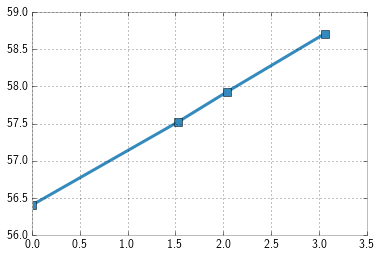

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
for tag in tag_list:
    ax.plot(calc_dict[tag]['biaxial_strain'][:], calc_dict[tag]['volume'][:], marker='s')
    #ax.plot(calc_dict[tag]['pressure'], calc_dict[tag]['volume'][:], marker='s')